In [58]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


Loading and preprocessing data

In [33]:
df_train = pd.read_csv('data/train.csv')

In [35]:

def pre_proc(df):
      df.drop(['title1_zh', 'title2_zh'], axis=1, inplace=True)
      df.drop(['id', 'tid1', 'tid2'], axis=1, inplace=True)

      df['title1_en'] = df['title1_en'].str.lower()
      df['title2_en'] = df['title2_en'].str.lower()

      df['title1_en'] = df['title1_en'].str.replace('[^\w\s]','')
      df['title2_en'] = df['title2_en'].str.replace('[^\w\s]','')

    

In [36]:
pre_proc(df_train)

Decision Tree

In [42]:
def prepare_data(data):
        x = data.iloc[:, :-1]
        y = data.iloc[:, -1]

        encoder = LabelEncoder()
        for col in x.columns:
            encoder.fit(x[col])
            x[col] = encoder.transform(x[col])
    
        scaler = StandardScaler()
        vals = scaler.fit_transform(x.values)
        x.iloc[:] = vals 

        return x, y

In [56]:
def metrics(data, depth):
        x,y = prepare_data(data)

        x_train, x_test, y_train, y_test = train_test_split(x, y)
        d_tree = DecisionTreeClassifier(max_depth=depth).fit(x_train, y_train)
        pred = d_tree.predict(x_test)

        cm = confusion_matrix(y_test, pred, labels=['agreed', 'disagreed', 'unrelated'])
        cf = classification_report(y_test, pred)

        return cm, cf

In [63]:
def show_overfitting(data):
        x, y = prepare_data(data)
        train_scores = list()
        test_scores = list()
        x_train, x_test, y_train, y_test = train_test_split(x, y)
        
        for i in range(1, 21):
            d_tree = DecisionTreeClassifier(max_depth=i).fit(x_train, y_train)
            train_pred = d_tree.predict(x_train)
            train_scores.append(accuracy_score(y_train, train_pred))
            test_pred = d_tree.predict(x_test)
            test_scores.append(accuracy_score(y_test, test_pred))

        plt.plot(list(range(1, 21)), train_scores, '-o', label='train')
        plt.plot(list(range(1, 21)), test_scores, '-o', label='test')
        plt.xlabel('Depth')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

Accuracy of train and test datasets for different tree depths

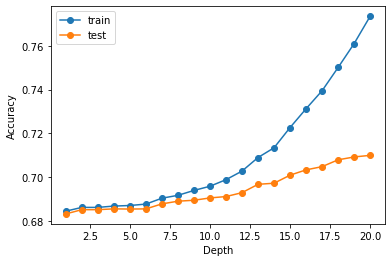

In [64]:
show_overfitting(df_train)

In [59]:
cm, cf = metrics(df_train, 10)

Classification Report

In [61]:
print(cf)

              precision    recall  f1-score   support

      agreed       0.60      0.07      0.13     23163
   disagreed       0.54      0.02      0.03      2088
   unrelated       0.70      0.98      0.81     54887

    accuracy                           0.69     80138
   macro avg       0.61      0.36      0.32     80138
weighted avg       0.67      0.69      0.59     80138



Confusion Matrix

In [62]:
pd.DataFrame(cm, index=['agreed', 'disagreed', 'unrelated'], columns=['agreed', 'disagreed', 'unrelated'])

,agreed,disagreed,unrelated
agreed,1635,4,21524
disagreed,52,33,2003
unrelated,1020,24,53843
